## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "inner")

# Display the data table for preview

combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

count1= combined_data["Mouse ID"].count()
count1


1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newclean = combined_data.drop_duplicates("Mouse ID")
newclean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
count2 = newclean["Mouse ID"].count()
count2

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dv = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summarystats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std_dv, "SEM": sem})
summarystats



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

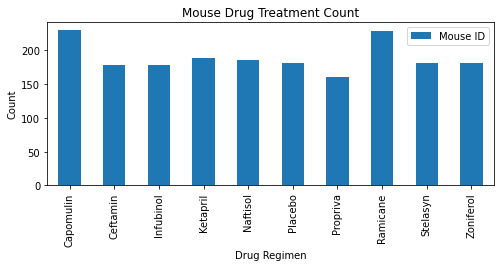

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()

drugs = drug_regimen[["Drug Regimen", "Mouse ID"]]
drugs = drugs.set_index("Drug Regimen")

drugs.plot(kind = "bar", figsize = (8,3))
plt.title ('Mouse Drug Treatment Count')
plt.ylabel ('Count')
plt.show()

Text(0, 0.5, 'Count')

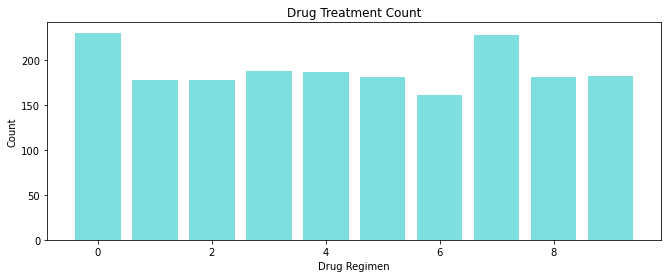

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

xaxis = np.arange(len(drug_regimen))

drug_count = (combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

tick_locations = [x for x in xaxis]


plt.figure(figsize=(11,4))
plt.bar(xaxis, drug_count, color='c', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")


In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

MaleFemale = pd.DataFrame(combined_data.groupby(["Sex"]).count()).reset_index()

MaleFemale = MaleFemale[["Sex", "Mouse ID"]]
MaleFemale.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


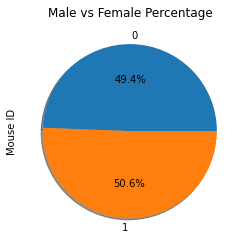

In [47]:
piepanda = MaleFemale.plot.pie(y="Mouse ID", title="Male vs Female Percentage", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0), \
                   shadow=True, startangle=0)


# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Was not able to figure out how to do it, I'm more comfortable with Pandas, please forgive me

## Quartiles, Outliers and Boxplots

In [8]:

regimes = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimes = regimes.sort_values(["Timepoint"], ascending=True)
regimes

regimesdata = regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

regimesdata.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0


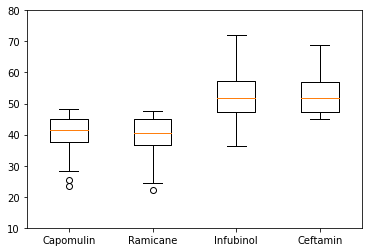

In [12]:

sortedregimens = regimes.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']


# Turn retrieved data into dataframe to easily manipulate
bestregimen_df = sortedregimens.to_frame()
bestregimen_df

#Create a list to use as labels and dataframe
fouregimens= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = regimes.reset_index()
list1 = boxplot.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
list1_df = pd.DataFrame(list1)
list1_df = list1_df.reindex(fouregimens)
tumor_volume = [vol for vol in list1_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volume, labels=fouregimens)
plt.ylim(10, 80)
plt.show()
    

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

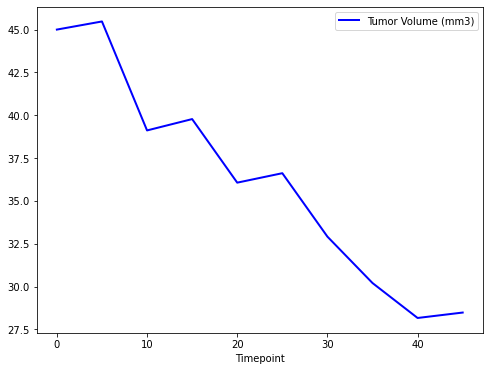

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin = capomulin.reset_index()

capo_mouse = capomulin.loc[capomulin["Mouse ID"] == "x401"]

capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

capo_mouse = capo_mouse.reset_index(drop=True)

capo_mouse.set_index("Timepoint").plot(figsize=(8,6), linewidth=2, color="blue") 


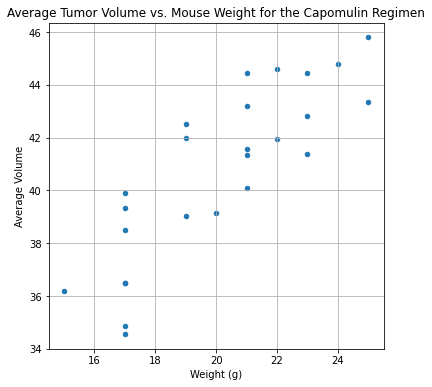

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

weight = capomulin.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

average = pd.DataFrame(weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

average = average.rename(columns={"Tumor Volume (mm3)": "Average Volume"})

average.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(6,6), title="Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

##Did not have enough time to complete, I apologize**